[출처](https://medium.com/bondata/%EC%B4%88%EC%8B%AC%EC%9E%90%EB%A5%BC-%EC%9C%84%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-eda-%EA%B0%80%EC%9D%B4%EB%93%9C%EB%9D%BC%EC%9D%B8-%EC%8B%A4%EC%8A%B5-62d11f93e17e)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# matplotlib 한글 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
%matplotlib inline

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')


### 1. 데이터 불러오기 및 확인

In [3]:
df = pd.read_csv('nyc_citibike.csv', encoding='euc-kr')
display(df.head())
display(df.info())

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72035 entries, 0 to 72034
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_date               72035 non-null  object 
 1   end_date                 72035 non-null  object 
 2   start_hour               72035 non-null  int64  
 3   end_hour                 72035 non-null  int64  
 4   trip_duration            72035 non-null  int64  
 5   start_station_id         72035 non-null  int64  
 6   start_station_name       72035 non-null  object 
 7   start_station_latitude   72035 non-null  float64
 8   start_station_longitude  72035 non-null  float64
 9   end_station_id           72035 non-null  int64  
 10  end_station_name         72035 non-null  object 
 11  end_station_latitude     72035 non-null  float64
 12  end_station_longitude    72035 non-null  float64
 13  bike_id                  72035 non-null  int64  
 14  usertype              

None

In [4]:
display(df.shape)
display(df.describe())

(72035, 18)

,start_hour,end_hour,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,day_since_register
count,72035.000000,72035.000000,7.203500e+04,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000
mean,14.176775,14.372916,1.046751e+03,1535.681488,40.738587,-73.983531,1537.181287,40.738292,-73.983435,26139.737683,1977.994947,30.468522
std,4.809857,4.854897,8.139700e+03,1418.093403,0.029777,0.018456,1420.198780,0.029736,0.018639,5793.540983,11.868175,17.341855
min,0.000000,0.000000,6.100000e+01,72.000000,40.646538,-74.025353,72.000000,40.646538,-74.044247,14529.000000,1885.000000,1.000000
25%,10.000000,10.000000,3.980000e+02,382.000000,40.718939,-73.995481,382.000000,40.718939,-73.995299,20533.000000,1969.000000,15.000000
50%,15.000000,15.000000,6.810000e+02,504.000000,40.740343,-73.986580,503.000000,40.739974,-73.986580,27840.000000,1980.000000,30.000000
75%,18.000000,18.000000,1.201000e+03,3223.000000,40.758997,-73.973747,3224.000000,40.758924,-73.973747,30995.000000,1988.000000,46.000000
max,23.000000,23.000000,1.344462e+06,3680.000000,40.814394,-73.907744,3680.000000,40.814394,-73.907744,33671.000000,2002.000000,60.000000


In [5]:
# 결측치 확인
df.isnull().sum().to_frame('nan_count')

,nan_count
start_date,0
end_date,0
start_hour,0
end_hour,0
trip_duration,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0


### 범주형/연속형 구분
+ 범주형 변수: 빈도(frequency) 계산 가능
+ 연속형 변수: 평균, 표준편차, 분산 등의 수학적 계산 가능

In [6]:
# 범주형이지만 수치형 타입을 가지고 있는 데이터를 범주형으로 변환
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)
df.dtypes 

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

### 데이터 도메인과 변수 이해
가지고 있는 데이터 변수를 의미적으로 묶어서 생각해야 한다.

1. 주행 시간 변수 (start_date, end_date, start_hour, end_hour, trip_duration)
2. 주행 위치 변수 (start_station_id,start_station_name, start_station_latitude, \
                start_station_longitutde, end_station_id,end_station_name, \
                end_station_latitude, end_station_longitude)
3. 바이크 종류 변수 (bike_id)
4. 유저 정보 변수 (usertype, birth_year, gender, day_since_register)


### 단변량 분석에서 변수들에 대해 알고 싶은 정보는?
1. trip_duration의 평균값은?
2. 가장 기록(대여 건수)이 많은 start_hour은 언제?
3. 유저의 성별 분포는?

### 서로 영향을 줄 변수들에 대한 기대 가설
1. 신규 가입자들이 한번 탈 때 더 짧게 사용할 것이다.
2. gender에 따라 trip_duration에 차이가 있을 것이다.
3. start_hour이 새벽 시간대일수록 trip_duration이 짧을 것이다.


## 단변량 분석

### 3.1 타겟 변수 분석
데이터에서 예측하고자 하는 y가 있다면 먼저 분석하자. 


In [7]:
# df에서 trip_duration은 second 단위여서 좀 더 직관적인 min으로 변경한다.

df['trip_duration_min'] = (df['trip_duration']/60).round(2)

In [9]:
df['trip_duration_min'].describe()

count    72035.000000
mean        17.445854
std        135.661656
min          1.020000
25%          6.630000
50%         11.350000
75%         20.020000
max      22407.700000
Name: trip_duration_min, dtype: float64

가장 작게 빌린 건수는 1분  
평균적으로 17분을 대여  
최대값은 22407분(약 15일)인 것으로 보아 이상치가 존재한다는 것을 유의할 것.  

In [19]:
22407/60/24

15.560416666666667

### 3.1.2 분포 파악

데이터가 많고 연속형이므로 seaborn의 distplot과 kdeplot을 활용 
+ kdeplot : Kernel Density Estimation plot. 
    확률밀도가 추정되어 discrete 변수를 continuous하게 만들어 준다. 
+ distplot : kdeplot + histogram

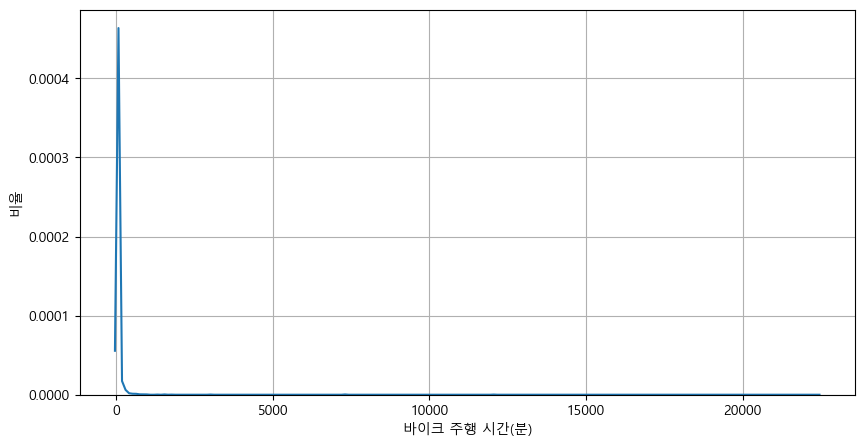

In [11]:
# kdeplot

plt.figure(figsize=(10, 5))
kde = sns.kdeplot(data=df, x='trip_duration_min')
kde.set_xlabel('바이크 주행 시간(분)')
kde.set_ylabel('비율')

plt.grid()
plt.show()

이상치의 존재로 정확한 분포를 파악할 수 없다. 

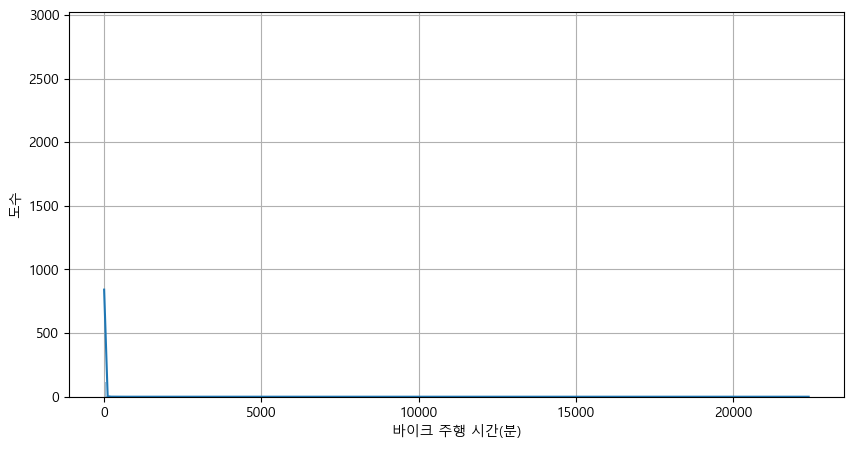

In [16]:
# histplot
plt.figure(figsize=(10, 5))

sns.histplot(data=df, x='trip_duration_min', kde=True)
plt.xlabel('바이크 주행 시간(분)')
plt.ylabel('도수')

plt.grid()
plt.show()

In [17]:
#skewness(왜도- 비대칭성) and kurtosis(첨도)
print("Skewness(왜도): %f" % df['trip_duration_min'].skew())
print("Kurtosis(첨도): %f" % df['trip_duration_min'].kurt())

Skewness(왜도): 116.002620
Kurtosis(첨도): 15913.195842


### 분포를 보고 생각해야 하는 기본 3가지

1. 정규분포를 따르고 있는가? / 정규분포와 유사한 형태를 띄는가?
    1. 시각화를 통해 정규분포의 모양인지 확인한다.
    2. 통계적 검정을 통해 확인한다.
2. 데이터의 치우침이 있는가.
3. 얼마나 뾰족한가? (데이터의 모임 정도)

---


### 3.1.3 타겟의 이상치 제거
위에서 살펴본 바, 목표로 하는 y값에 과하게 큰 값이 있다.  
이상치를 제거한 후 다시 EDA를 수행한다.  

이상치(outlier)가 존재하면 아래와 같은 문제가 발생한다.  
+ y와 다른 변수의 관계를 살펴볼 때 분포가 길게 늘어져 세밀하게 살펴 볼 수 없다.
+ 이상치 때문에 모델 성능에 악영향을 끼칠 수 있다.

(하지만, 이상치를 반드시 제거해야 하는 것은 아니다.  
이상치도 어떤 정보를 제공할 수 있기 때문이다.)

__이상치를 제거해보자.__
일단 y값 기준, 상위 1% 값을 제거하는 방식을 사용해보자. 

In [21]:
# 상위 99% 값을 cut_point로 지정
cut_point = df['trip_duration_min'].quantile(0.99)
print('top 99% value: ', cut_point)

df_cut_99 = df[df['trip_duration_min'] < cut_point]

top 99% value:  69.71600000000035


In [44]:
df[df['trip_duration_min']>5000].sort_values('trip_duration_min', ascending=False)

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register,trip_duration_min
21308,2018-05-01,2018-05-17,21,11,1344462,3080,S 4 St & Rodney St,40.709340,-73.956080,3245,NYCBS DEPOT - DELANCEY,40.716444,-73.982331,32245,Customer,1971,male,7,22407.70
45344,2018-05-01,2018-05-13,14,17,1047389,515,W 43 St & 10 Ave,40.760094,-73.994618,3203,Hamilton Park,40.727596,-74.044247,28543,Subscriber,1967,female,52,17456.48
55401,2018-05-01,2018-05-09,9,18,724040,498,Broadway & W 32 St,40.748549,-73.988084,498,Broadway & W 32 St,40.748549,-73.988084,30298,Subscriber,1984,male,48,12067.33
28983,2018-05-01,2018-05-09,17,13,680082,387,Centre St & Chambers St,40.712733,-74.004607,3303,Butler St & Court St,40.684989,-73.994403,19841,Customer,1969,unknown,25,11334.70
67912,2018-05-01,2018-05-06,20,21,437994,3077,Stagg St & Union Ave,40.708771,-73.950953,3043,Lewis Ave & Decatur St,40.681460,-73.934903,24983,Customer,1988,male,39,7299.90
24361,2018-05-01,2018-05-06,13,12,427114,426,West St & Chambers St,40.717548,-74.013221,3658,W 18 St & 9 Ave,40.743534,-74.003676,26909,Subscriber,1954,male,5,7118.57
76,2018-05-01,2018-05-05,2,2,347749,3232,Bond St & Fulton St,40.689622,-73.983043,450,W 49 St & 8 Ave,40.762272,-73.987882,27371,Customer,1969,unknown,44,5795.82


#### 이상치를 제거하고 분포를 다시 그려보면

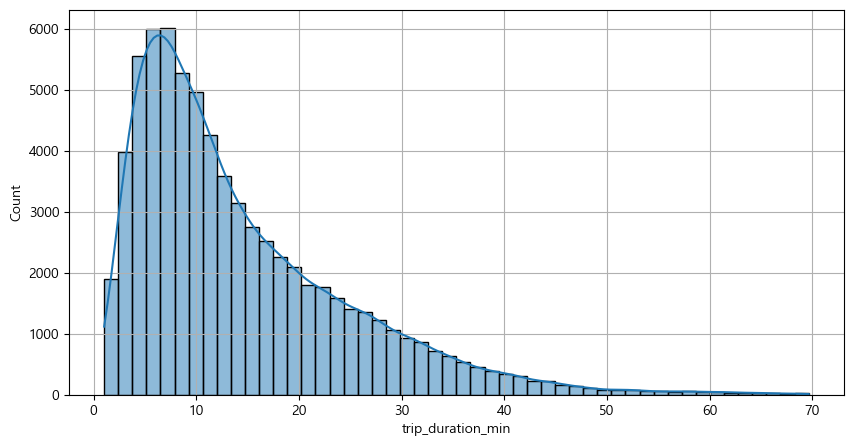

In [28]:
# histplot
plt.figure(figsize=(10, 5))

sns.histplot(data=df_cut_99, x='trip_duration_min', bins=50, kde=True)
plt.grid()
plt.show()

In [30]:
#skewness(왜도- 비대칭성) and kurtosis(첨도)
print("Skewness(왜도): %f" % df_cut_99['trip_duration_min'].skew())
print("Kurtosis(첨도): %f" % df_cut_99['trip_duration_min'].kurt())

Skewness(왜도): 1.418010
Kurtosis(첨도): 2.307992


## 3.2 범주형 변수 빈도 파악
### 3.2.1 범주혀 변수가 30개 이하일 때, 빈도표(Counting and Basic Frequency Plots)
> 30개가 아니더라도, 범주형 변수의 고유 값이 x축에 전부 표현할 수 있을 때

__A. DataFrame.plot() 형태__  
장점: 편리하다.  
단점: 예쁘지가 않다.



In [65]:
# 대여 시작 시간대(start_hour)의 빈도표
df_cut_99[['start_hour']].value_counts().to_frame().reset_index(drop=False)

,start_hour,count
0,18,8171
1,17,7954
2,8,6640
3,19,5576
4,16,4687
5,9,4265
6,7,3971
7,20,3624
8,15,3544
9,14,3398


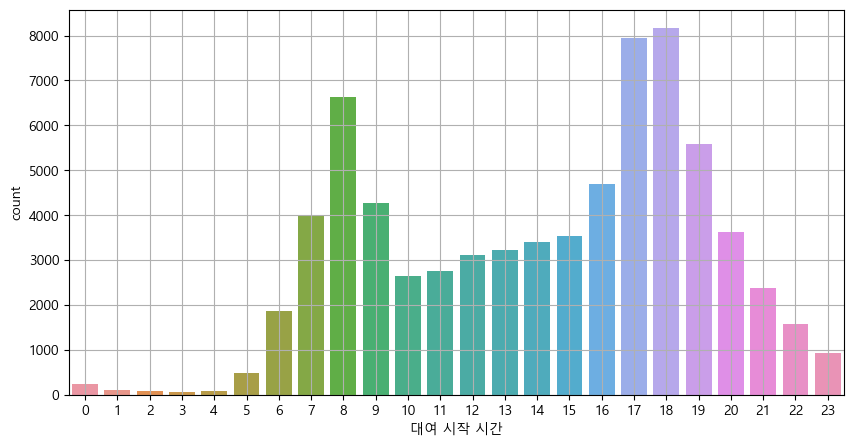

In [68]:
# 시간 순으로 정렬
plt.figure(figsize=(10, 5))
temp_df = df_cut_99[['start_hour']].value_counts().reset_index().sort_values('start_hour', ascending=True)
sns.barplot(data=temp_df, x='start_hour', y='count')
plt.xlabel('대여 시작 시간')
plt.ylabel('count')

plt.grid()
plt.show()

#### 그래프 해석

주로 오후 5 ~ 6시가 가장 많은 대여 건수를 보이고, 그 다음 오전 8시에 많은 건수를 보인다.  
뉴욕 기준 퇴근과 출근 시간대의 양상을 반영하고 있다.  

새벽 시간대 특히 0~4시에서 대여 건수는 매우 낮다.  

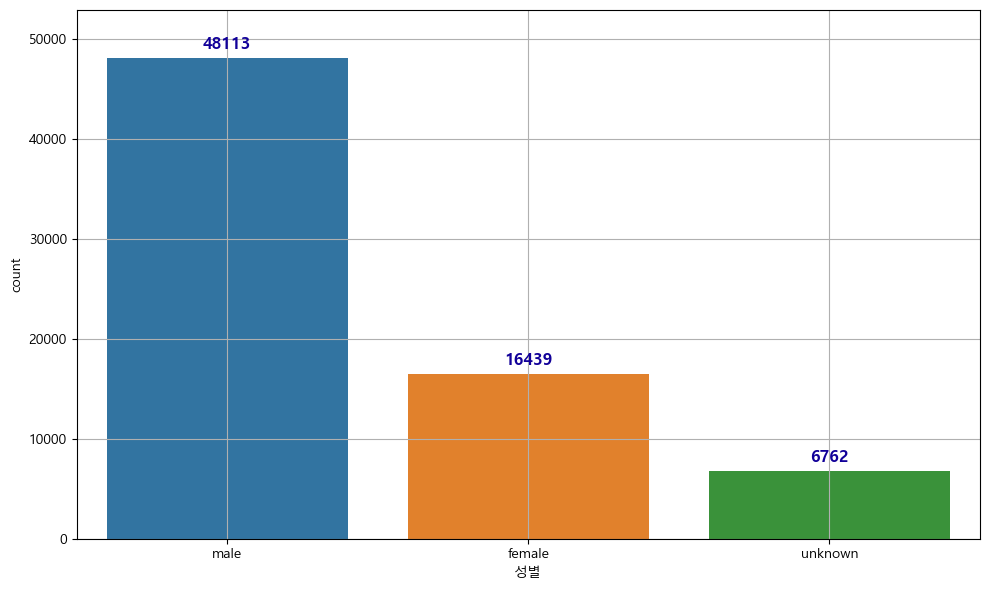

In [98]:
# 성별(gender)의 빈도표
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_cut_99, x='gender')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext = (0, 10),
                textcoords='offset points',
                color='#110099', 
                fontsize=12,
                fontweight='bold',
                )

plt.xlabel('성별')
plt.ylabel('count')
plt.ylim(0, df_cut_99['gender'].value_counts().max()*1.1)
plt.tight_layout()
plt.grid()
plt.show()

### 해석 보태기
남성 사용자(48113 명)가 여자 사용자(16439 명)보다 3배 정도 많다.

### 3.2.2 범주형 변수가 30개 이상일 때, 빈도표